# The Battle of the Neighborhoods - Week 2
### Part 3 Download and Explore Days of Operation dataset
#### Download all the dependencies needed

In [8]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy  # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!pip install seaborn
import seaborn as sns

!pip install folium==0.5.0 # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 81kB 10.5MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
  Found existing installation: folium 0.11.0
    Uninstalling folium-0.11.0:
      Successfully uninstalled folium-0.11.0
Libraries imported.


##### The dataset is downloaded from the website. The link is as given below :

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

In [75]:
# The code was removed by Watson Studio for sharing.

,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Urban Oasis Farmers' Market,681 Clarkson Ave.,40.656255,-73.936608,Wednesday,2pm-5:30pm,06/24/20-11/04/20,No,No,NaN,NaN,"(40.656255, -73.936608)"
1,Staten Island,Goodhue Center Go!Healthy Farm Stand,301 Prospect Ave,40.638983,-74.097422,Tuesday,11am-2pm,07/06/20-11/20/20,Yes,No,NaN,NaN,"(40.638983, -74.097422)"
2,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,40.801155,-73.959647,Saturday,9am-4pm (winter closes at 3pm),Year-Round,Yes,Yes,NaN,NaN,"(40.801155, -73.959647)"
3,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30pm-6:30pm,7/15/20-11/25/20,Yes,No,NaN,NaN,"(40.839882, -73.916783)"
4,Manhattan,Go!Healthy Farm Stand at Mirabal Sisters Campus,21 Jumel Pl.,40.839305,-73.936159,Friday,11am-2pm,07/07/2020-11/20/20,Yes,No,NaN,NaN,"(40.839305, -73.936159)"


In [88]:
FM_NYC.rename(columns={'Days of Operation':'DOO'}, inplace=True)
print(FM_NYC.DOO.unique())

['Wednesday' 'Tuesday' 'Saturday' 'Friday'
 'Monday \nWednesday\nFriday\nSaturday' 'Sunday' 'Thursday'
 'Friday & Saturday' 'Wednesday \nSunday' 'Saturday & Sunday'
 'Wednesday, Thursday, Friday; Saturday and Sunday'
 'Tuesday \nThursday\nSaturday' 'Tuesday\nThursday' 'Tuesday\nFriday'
 'Monday' 'Wednesday \nSaturday' 'Wednesday \nFriday'
 'Wednesday\nSaturday' 'TBD' 'Thursday \nSaturday' 'Tuesday \nFriday'
 'Wednesday \nThursday\nFriday' 'Tuesday\nSaturday' 'Thursday\nSunday']


In [89]:
FM_NYC['DOO'].value_counts().to_frame()


,DOO
Saturday,40
Wednesday,20
Sunday,17
Thursday,16
Tuesday,14
Friday,13
Tuesday\nThursday,2
Tuesday\nFriday,2
Tuesday \nFriday,2
Friday & Saturday,1


NameError: name 'ax' is not defined

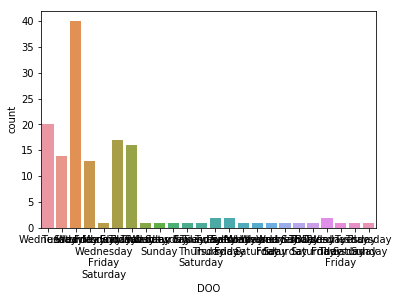

In [90]:
sns.countplot(x='DOO',data=FM_NYC)
ax.set_title("DOO")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [91]:
# FM_NYC_filtered - Dataset with only Farmers Market
FM_NYC_filtered = FM_NYC[FM_NYC['DOO'] == 'Saturday'].copy()
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()

(40, 13)


,Borough,Market_Name,Street Address,Latitude,Longitude,DOO,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
2,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,40.801155,-73.959647,Saturday,9am-4pm (winter closes at 3pm),Year-Round,Yes,Yes,NaN,NaN,"(40.801155, -73.959647)"
7,Queens,Ditmars Park Farmstand,"Steinway St bet Ditmars Blvd & 23rd Ave., at D...",40.772854,-73.906061,Saturday,9:30am-2pm,07/11/20-11/21/20 estimate,Yes,No,NaN,NaN,"(40.772854, -73.906061)"
9,Brooklyn,McCarren Park Greenmarket,Union Ave bet Driggs and N 12th Sts,40.719219,-73.952479,Saturday,8am - 2pm,Year-Round,Yes,Yes,NaN,NaN,"(40.719219, -73.952479)"
10,Brooklyn,Flatbush Junction Farmstand,Nostrand & Flatbush Aves,40.632886,-73.947698,Saturday,9am-2pm,07/11/20-11/21/20 estimate,Yes,No,NaN,NaN,"(40.632886, -73.947698)"
11,Bronx,South Bronx Farmers Market,E 138th St bet Willis & Alexander Aves,40.809107,-73.922887,Saturday,9am-2pm,2020-07-11T00:00:00.000,Yes,No,NaN,NaN,"(40.809107, -73.922887)"


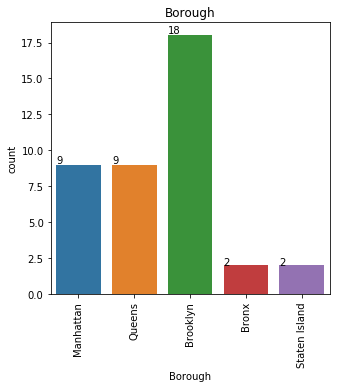

In [92]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()


Use geopy library to get the latitude and longitude values of New York City.

The geograpical coordinate of New York City are 40.7308619, -73.9871558.

In [117]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Create a map of New York with Borough of Farmers Market superimposed on top.

In [127]:

!pip install folium  # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map



#venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Borough',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_markets)

for lat, lng, label in zip(FM_NYC_filtered['Latitude'], FM_NYC_filtered['Longitude'], FM_NYC_filtered['Borough']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_markets)

# display map
map_markets